In [1]:
# 필요한 라이브러리를 불러오고, 각 단계별로 주석을 추가하여 주피터 노트북을 만들기 시작한다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Titanic Dataset Analysis
#
#This Jupyter Notebook guides you through the process of analyzing the Titanic dataset, which includes loading the data, cleaning, exploring, and finally predicting survival rates with a simple model.

## 1. Data Loading and Initial Inspection
# Load the dataset
data = pd.read_csv('data/titanic.csv')

# Display the first few rows of the dataframe
print(data.head())

# Check for missing values
print(data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [3]:
# Handling missing values - Example: Fill missing age values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop unnecessary columns
data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)


/var/folders/3r/11j8sv7j61n3xhd_mz9pj_r00000gn/T/ipykernel_23107/1664525662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


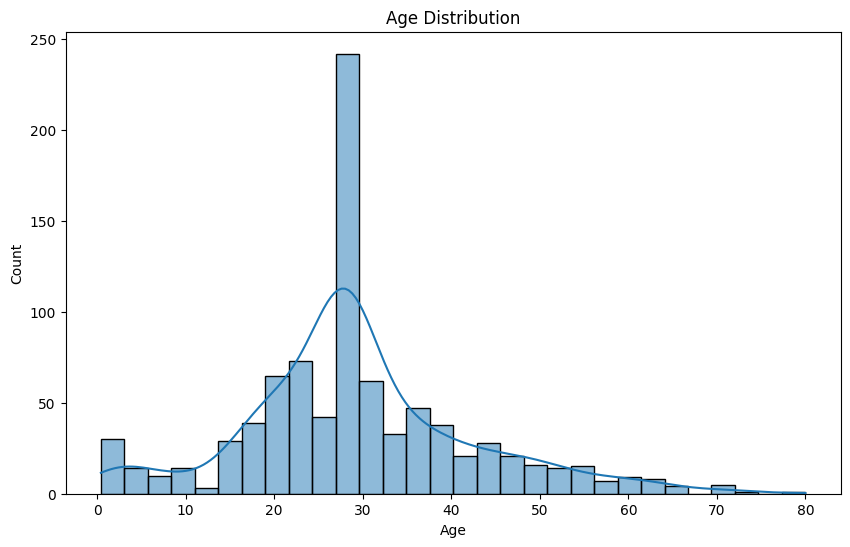

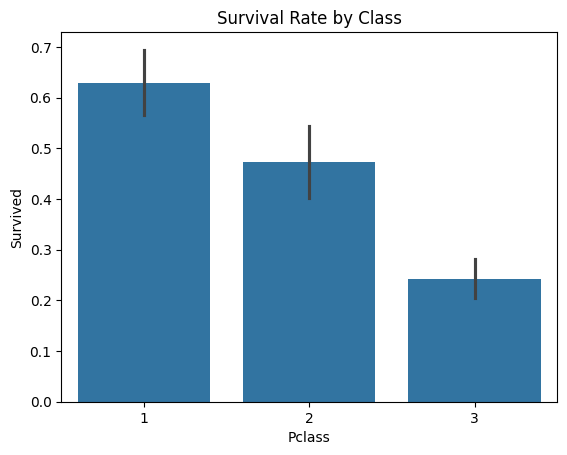

In [4]:
# Visualizing the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Relationship between Passenger Class and Survival
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# 1. 불필요한 컬럼 제거
data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


In [6]:

# Define the target variable and features
X = data.drop('Survived', axis=1)
y = data['Survived']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# Fit the model
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]


/Users/saintphs/Desktop/Dev/aSSIST_DM1/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.metrics import recall_score, f1_score

# 리콜(재현율) 계산
recall = recall_score(y_test, y_pred, pos_label=1)  # 'pos_label'은 양성 클래스를 지정합니다. 필요에 따라 변경해주세요.
print(f'Recall: {recall}')

# F1 스코어 계산
f1 = f1_score(y_test, y_pred, pos_label=1)  # 'pos_label'은 양성 클래스를 지정합니다. 필요에 따라 변경해주세요.
print(f'F1 Score: {f1}')


Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


In [ ]:
x